In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# benin = pd.read_csv("../src/benin-malanville.csv")
# sir = pd.read_csv("../src/benin-madsdlanville.csv")
# benidsn = pd.read_csv("../src/benin-sd.csv")
dataset_info = [
    ("benin", "../src/benin-malanville.csv"),
    ("sierraleone", "../src/sierraleone-bumbuna.csv"),
    ("togo", "../src/togo-dapaong_qc.csv")
]

def get_summary_stats(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    summary_stats = df[numeric_cols].describe()
    return summary_stats

for dataset_name, file_path in dataset_info:
    print(f"Summary statistics for {dataset_name}:")
    data = pd.read_csv(file_path)
    summary_stats = get_summary_stats(data)
    print(summary_stats)
    print()

Summary statistics for benin:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%

In [7]:
for dataset_name, file_path in dataset_info:
    print(f"the first 5 for {dataset_name}:")
    data = pd.read_csv(file_path)
    print(data.head())


the first 5 for benin:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [11]:

# to check if there is null in the datas
for dataset_name, file_path in dataset_info:
    print(f"{dataset_name}:")
    print()
    data = pd.read_csv(file_path)
    print(data.isnull().sum())
    print()

benin:

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

sierraleone:

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

togo:

Timestamp             0
GHI    

In [6]:
#checking the non negative column like
print((benin[[ 'WS','WSgust','WSstdev','WD',"WDstdev","BP",'Precipitation','TModA','TModB','RH','Cleaning','ModA', "ModB",'GHI', 'DNI', 'DHI']] < 0).sum())


WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Precipitation         0
TModA                 0
TModB                 0
RH                    0
Cleaning              0
ModA                  0
ModB                  0
GHI              258847
DNI              275987
DHI              259182
dtype: int64


benin:



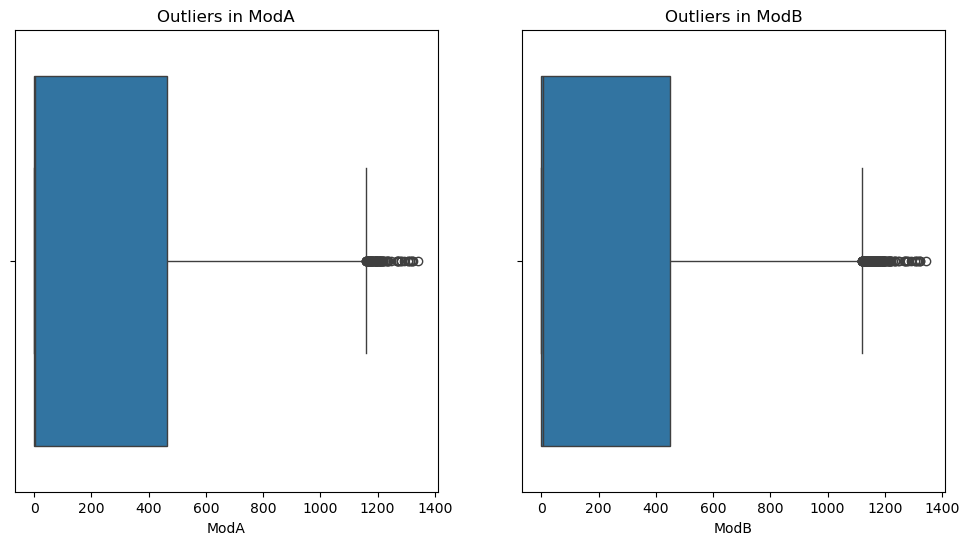


sierraleone:



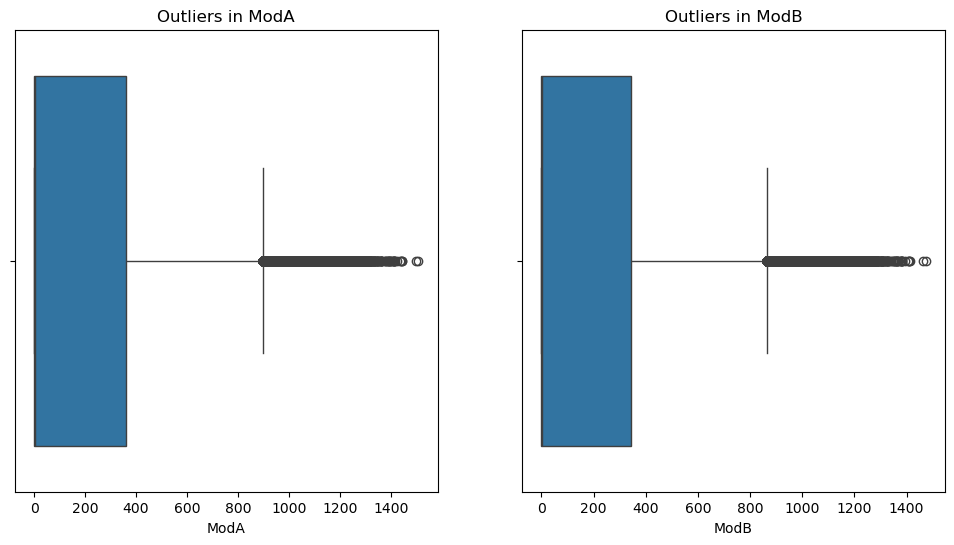


togo:



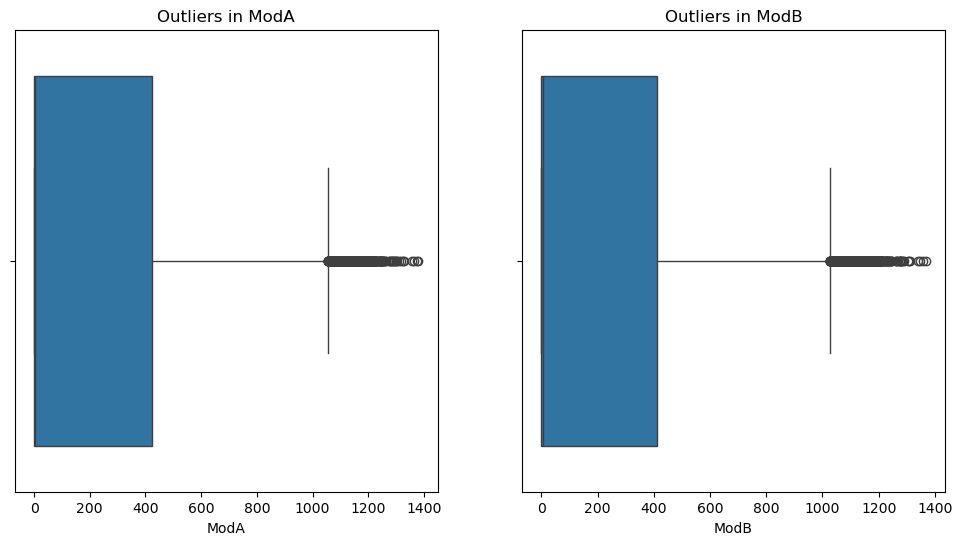

In [16]:
# Check for outliers in sensor readings (ModA, ModB)

for dataset_name, file_path in dataset_info:
    print(f"{dataset_name}:")
    print()
    data = pd.read_csv(file_path)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # ModA
    sns.boxplot(x=data['ModA'], ax=ax[0])
    ax[0].set_title('Outliers in ModA')

    # ModB
    sns.boxplot(x=data['ModB'], ax=ax[1])
    ax[1].set_title('Outliers in ModB')

    plt.show()
    print()
    
# only have upper outlier

benin:



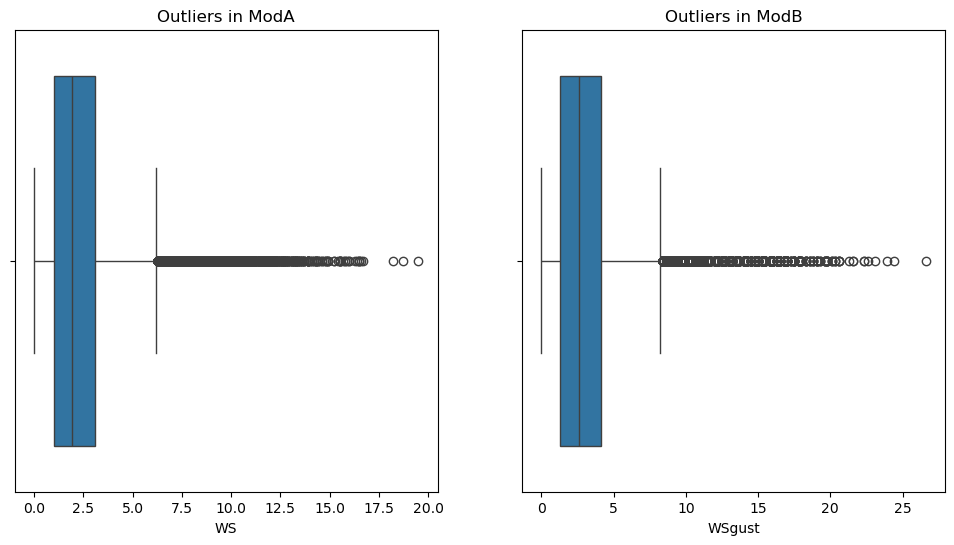


sierraleone:



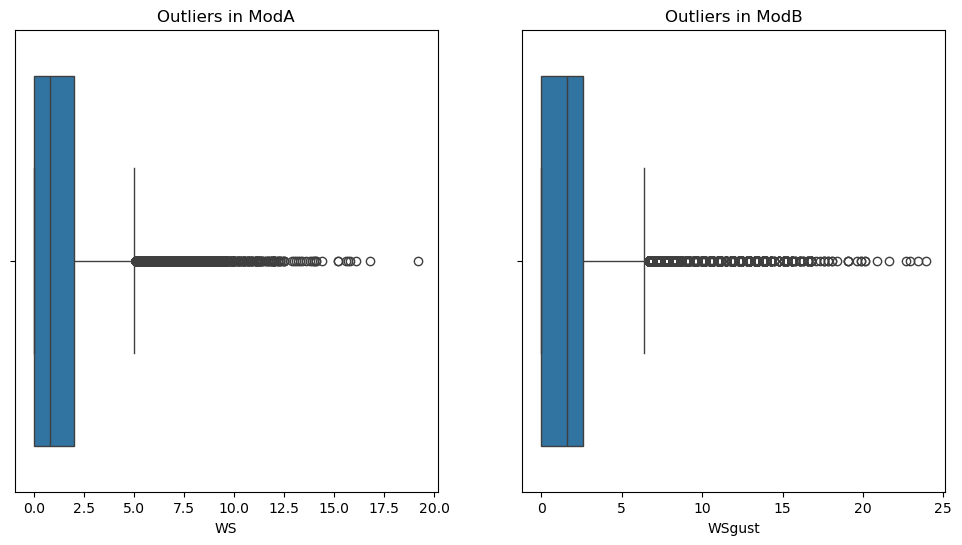


togo:



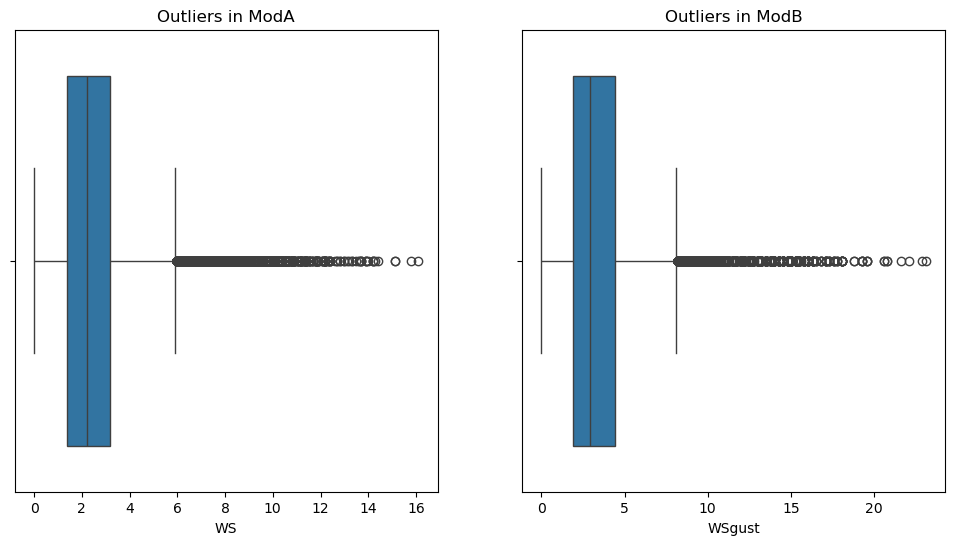

In [17]:
for dataset_name, file_path in dataset_info:
    print(f"{dataset_name}:")
    print()
    data = pd.read_csv(file_path)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # ModA
    sns.boxplot(x=data['WS'], ax=ax[0])
    ax[0].set_title('Outliers in ModA')

    # ModB
    sns.boxplot(x=data['WSgust'], ax=ax[1])
    ax[1].set_title('Outliers in ModB')

    plt.show()
    print()
    
# only have upper outlier

benin:



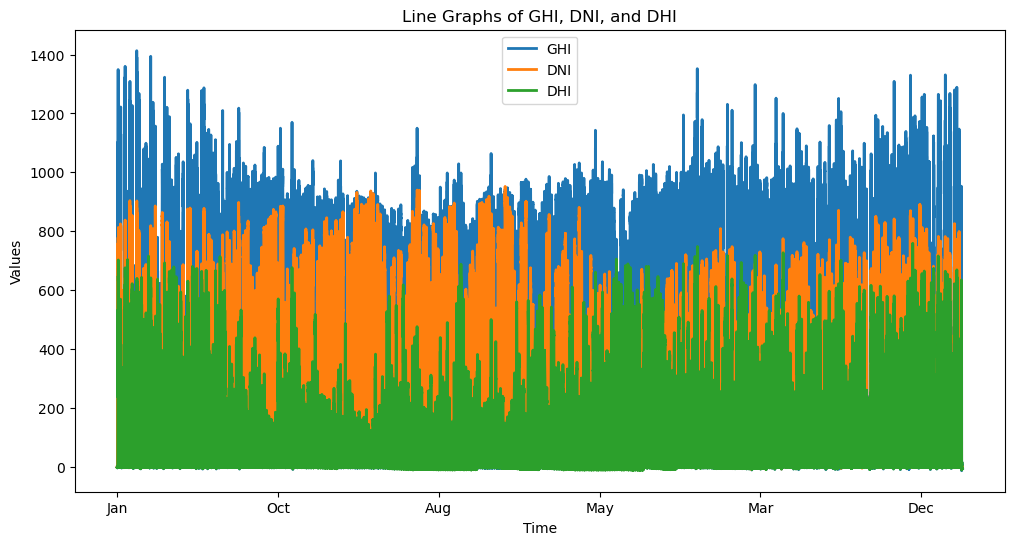

sierraleone:



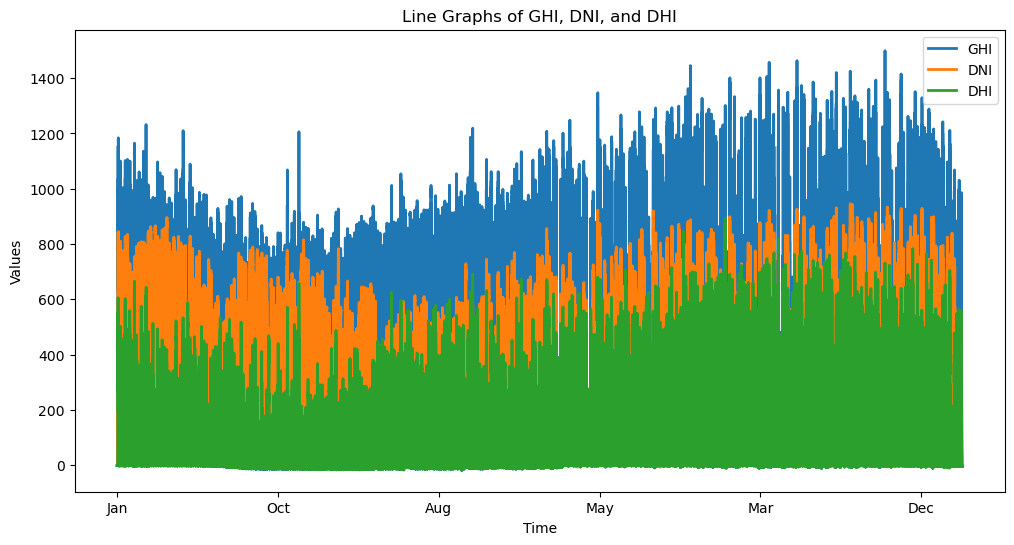

togo:



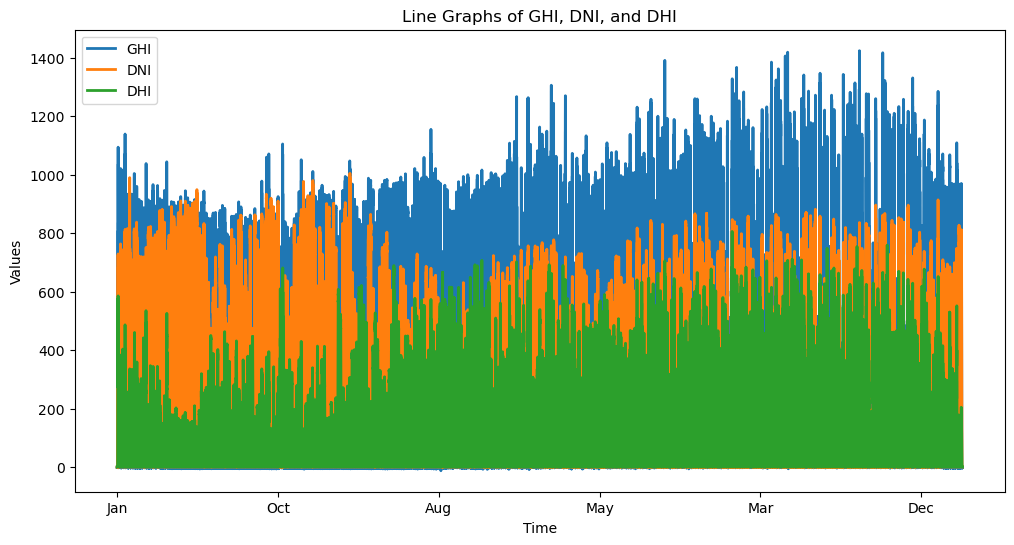

In [18]:
# Line graphs
from matplotlib.dates import DateFormatter
for dataset_name, file_path in dataset_info:
    print(f"{dataset_name}:")
    print()
    data = pd.read_csv(file_path)

    fig, ax = plt.subplots(figsize=(12, 6))
    data.plot(x='Timestamp', y=['GHI', 'DNI', 'DHI'], ax=ax, lw=2)
    ax.xaxis.set_major_formatter(DateFormatter('%b'))
    ax.set_title('Line Graphs of GHI, DNI, and DHI')
    ax.set_xlabel('Time')
    ax.set_ylabel('Values')
    ax.legend()
    plt.show()

benin:



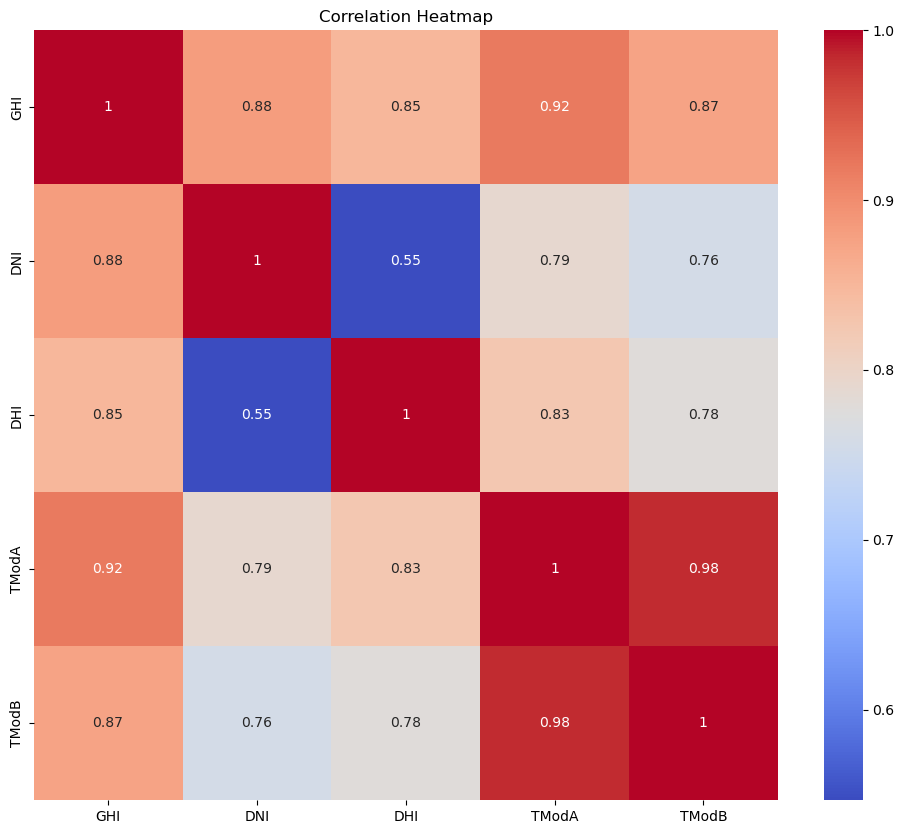

sierraleone:



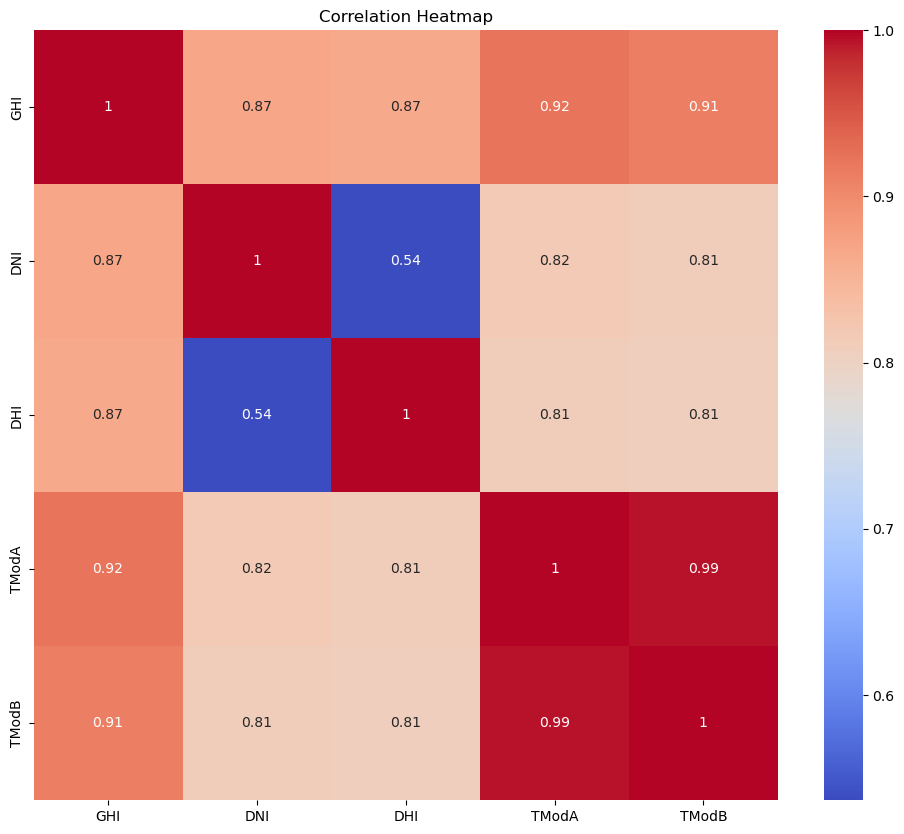

togo:



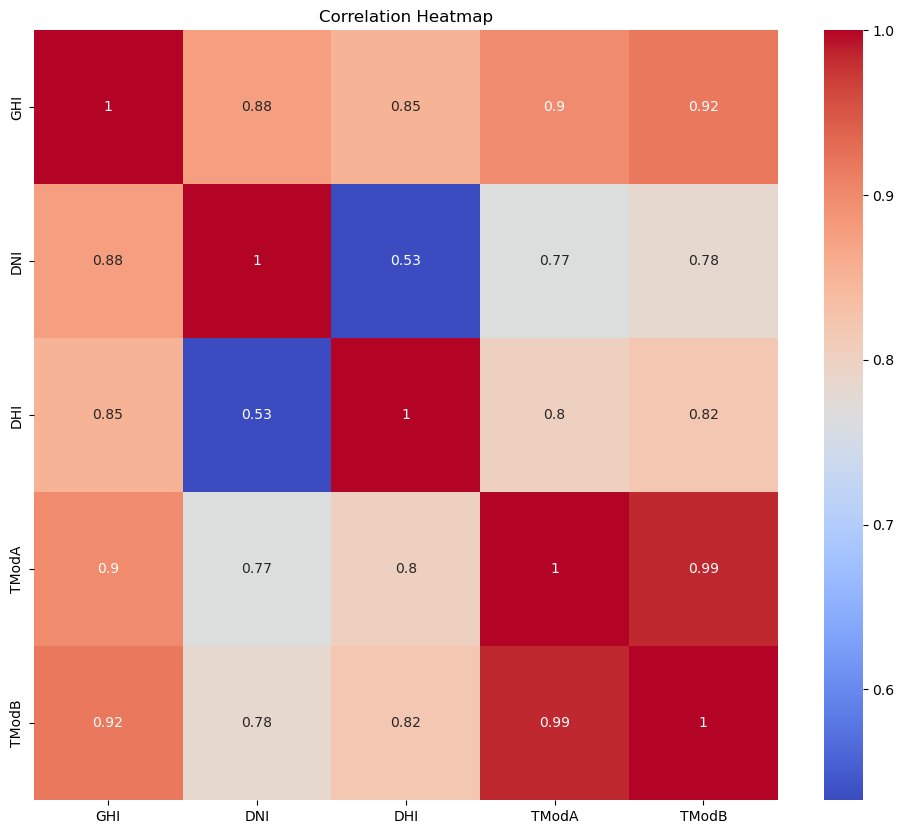

In [19]:
#Heat Map
for dataset_name, file_path in dataset_info:
    print(f"{dataset_name}:")
    print()
    data = pd.read_csv(file_path)
    fig, ax = plt.subplots(figsize=(12, 10))
    corr_matrix = data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title('Correlation Heatmap')
    plt.show()

In [ ]:
####

benin:



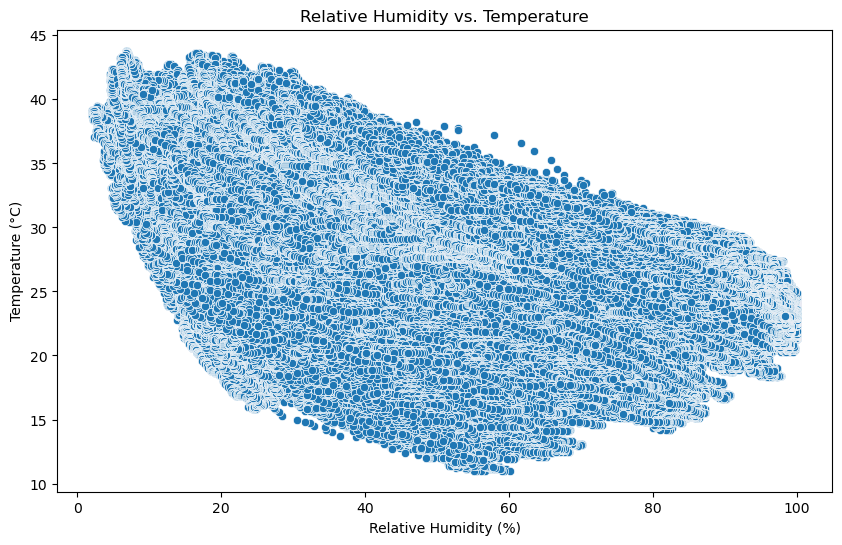

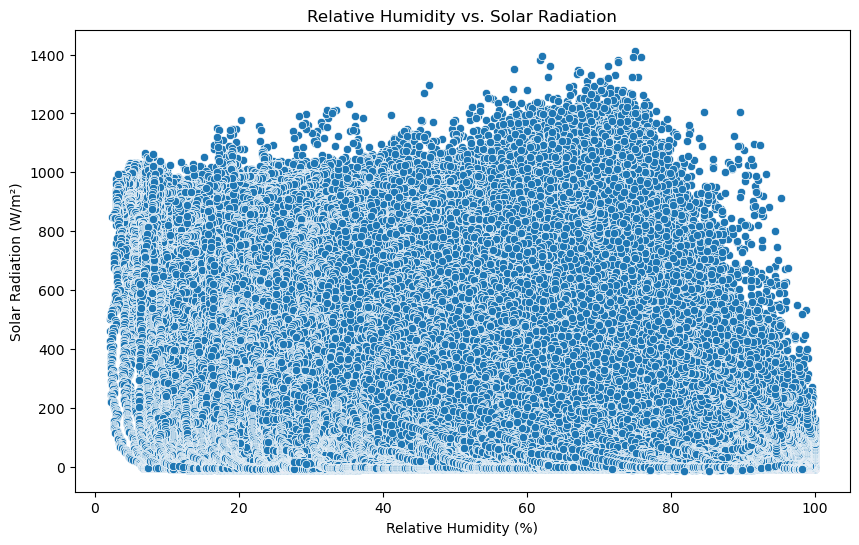

Correlation between RH and Temperature: -0.41484177497995384
Correlation between RH and Solar Radiation: -0.36002868854990583


sierraleone:



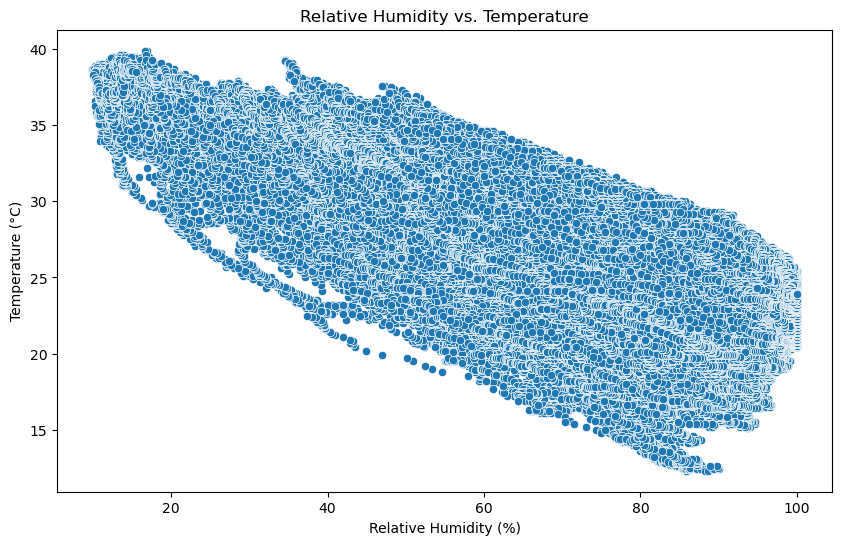

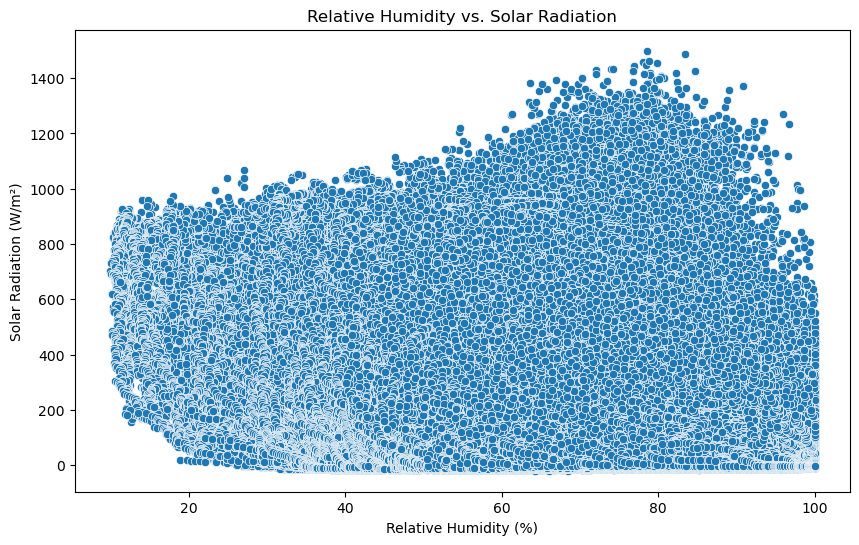

Correlation between RH and Temperature: -0.7919366521547992
Correlation between RH and Solar Radiation: -0.5466774606672339


togo:



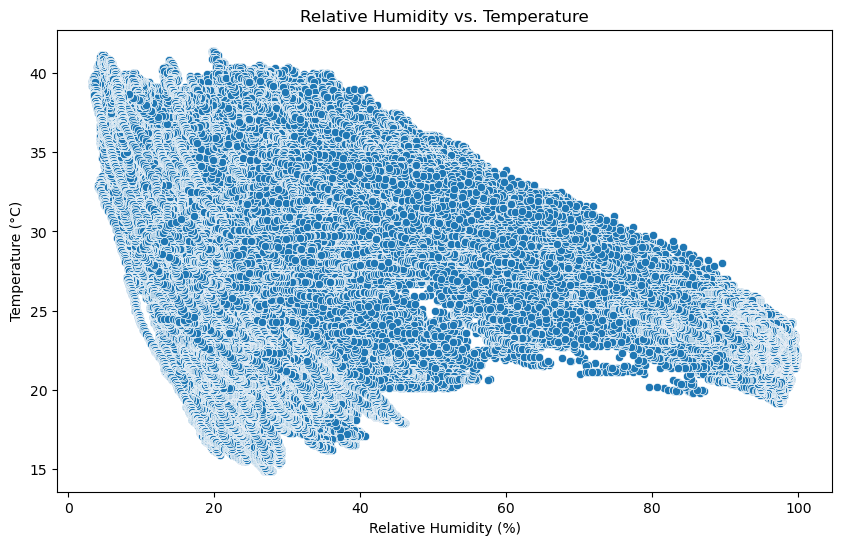

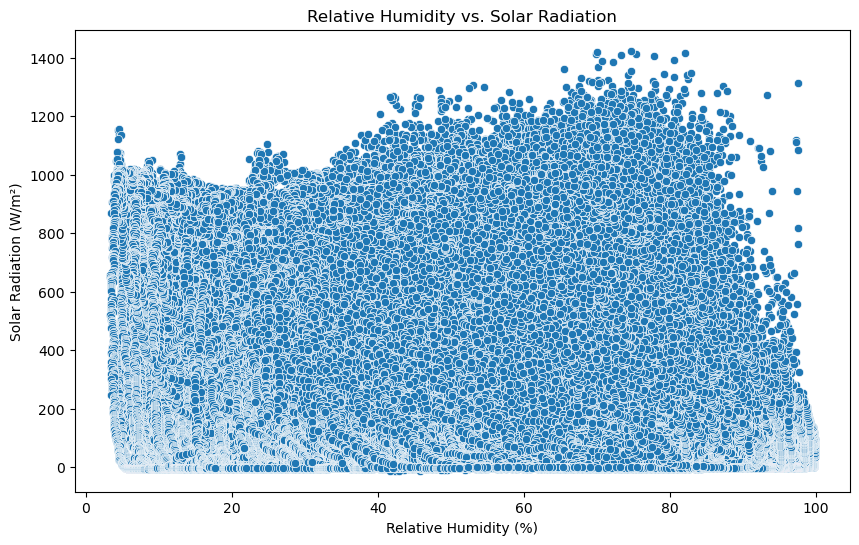

Correlation between RH and Temperature: -0.4004104673516784
Correlation between RH and Solar Radiation: -0.25807671855319214




In [21]:
for dataset_name, file_path in dataset_info:
    print(f"{dataset_name}:")
    print()
    data = pd.read_csv(file_path)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='RH', y='Tamb', data=data)
    plt.title('Relative Humidity vs. Temperature')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Temperature (°C)')
    plt.show()
    
    # Examine the relationship between RH and solar radiation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='RH', y='GHI', data=data)
    plt.title('Relative Humidity vs. Solar Radiation')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Solar Radiation (W/m²)')
    plt.show()
    
    # Analyze the correlations
    print('Correlation between RH and Temperature:', data['RH'].corr(data['Tamb']))
    print('Correlation between RH and Solar Radiation:', data['RH'].corr(data['GHI']))
    print()
    print()

benin:



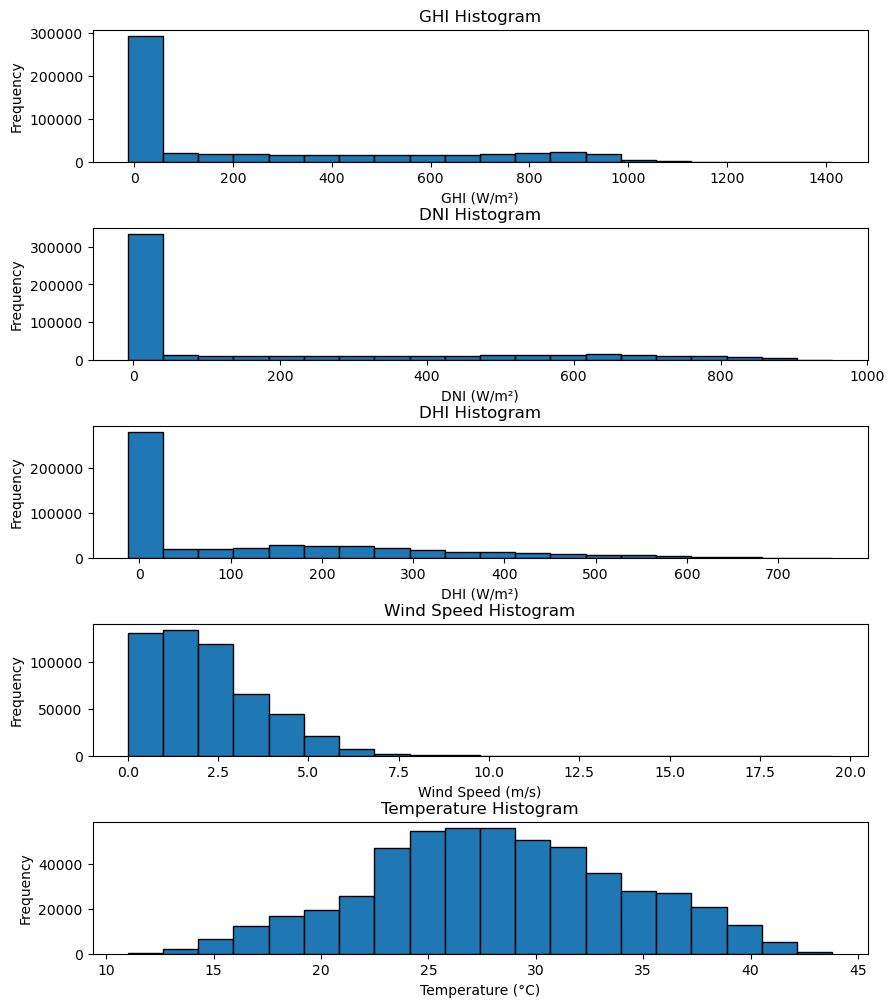

sierraleone:



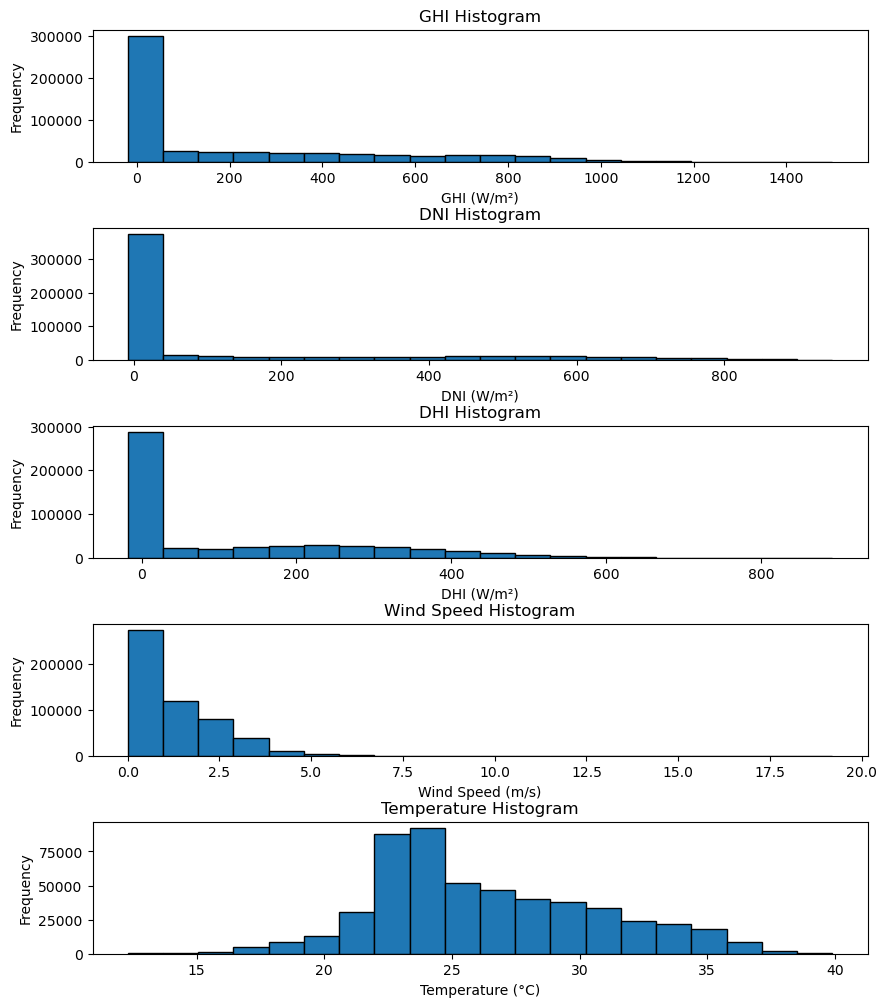

togo:



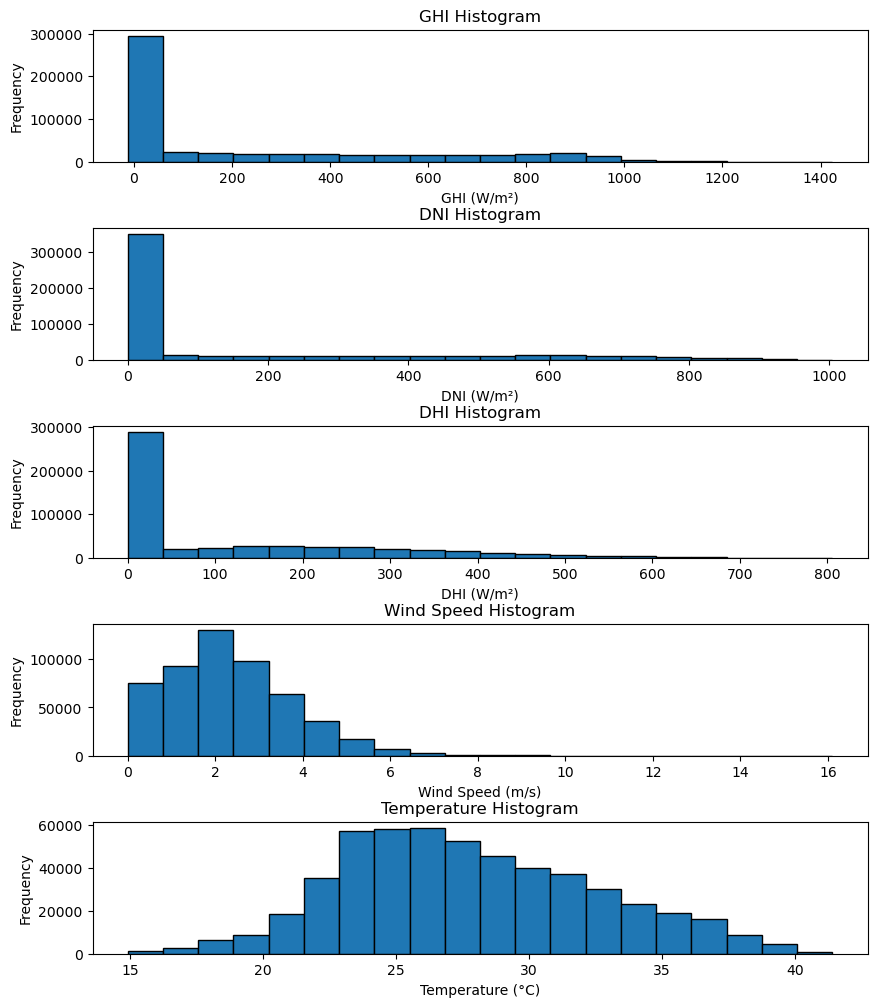

In [22]:
# Create the histograms
for dataset_name, file_path in dataset_info:
    print(f"{dataset_name}:")
    print()
    data = pd.read_csv(file_path)
    fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 12))
    
    axs[0].hist(data['GHI'], bins=20, edgecolor='black')
    axs[0].set_title('GHI Histogram')
    axs[0].set_xlabel('GHI (W/m²)')
    axs[0].set_ylabel('Frequency')
    
    axs[1].hist(data['DNI'], bins=20, edgecolor='black')
    axs[1].set_title('DNI Histogram')
    axs[1].set_xlabel('DNI (W/m²)')
    axs[1].set_ylabel('Frequency')
    
    axs[2].hist(data['DHI'], bins=20, edgecolor='black')
    axs[2].set_title('DHI Histogram')
    axs[2].set_xlabel('DHI (W/m²)')
    axs[2].set_ylabel('Frequency')
    
    axs[3].hist(data['WS'], bins=20, edgecolor='black')
    axs[3].set_title('Wind Speed Histogram')
    axs[3].set_xlabel('Wind Speed (m/s)')
    axs[3].set_ylabel('Frequency')
    
    axs[4].hist(data['Tamb'], bins=20, edgecolor='black')
    axs[4].set_title('Temperature Histogram')
    axs[4].set_xlabel('Temperature (°C)')
    axs[4].set_ylabel('Frequency')
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()


In [ ]:
# ###############

benin:



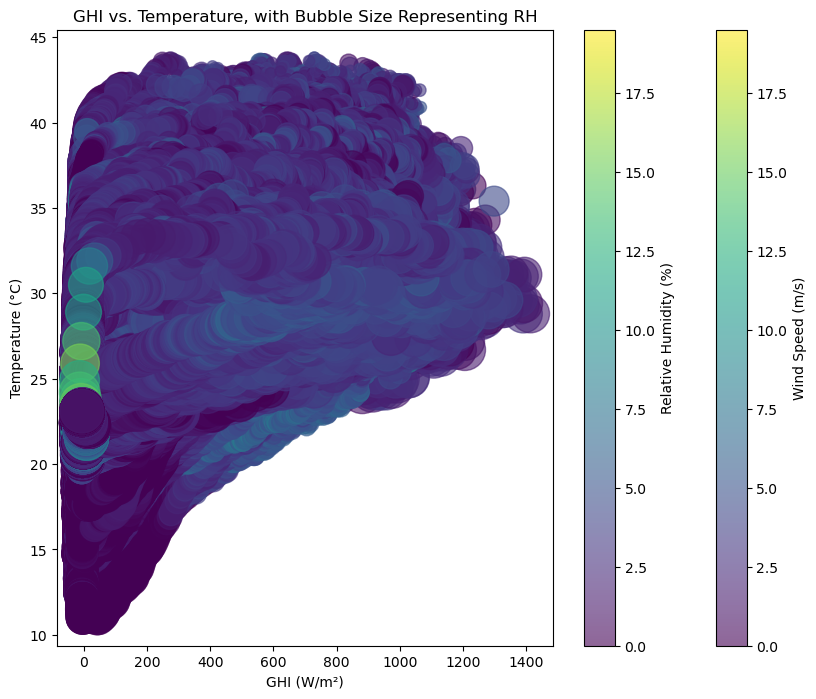

sierraleone:



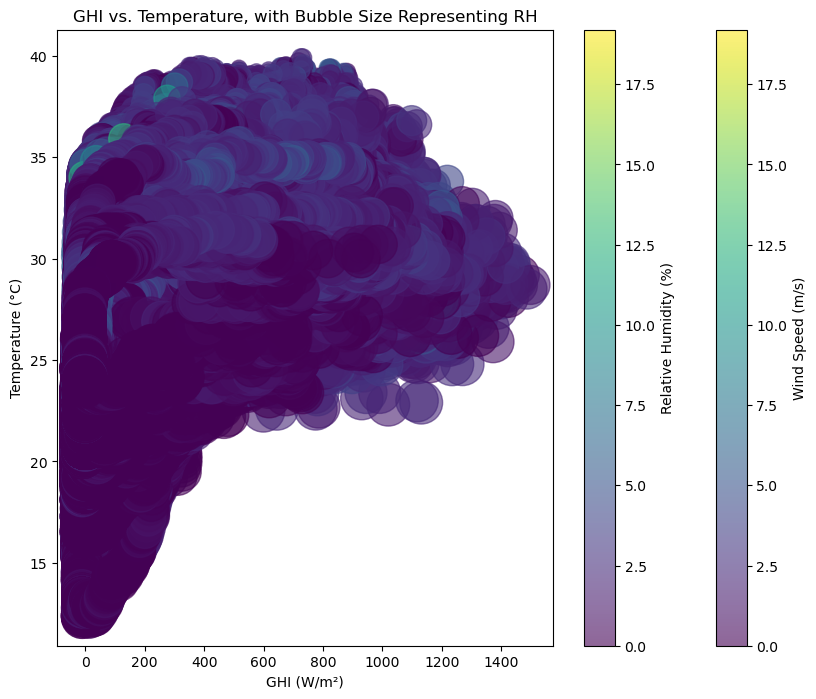

togo:



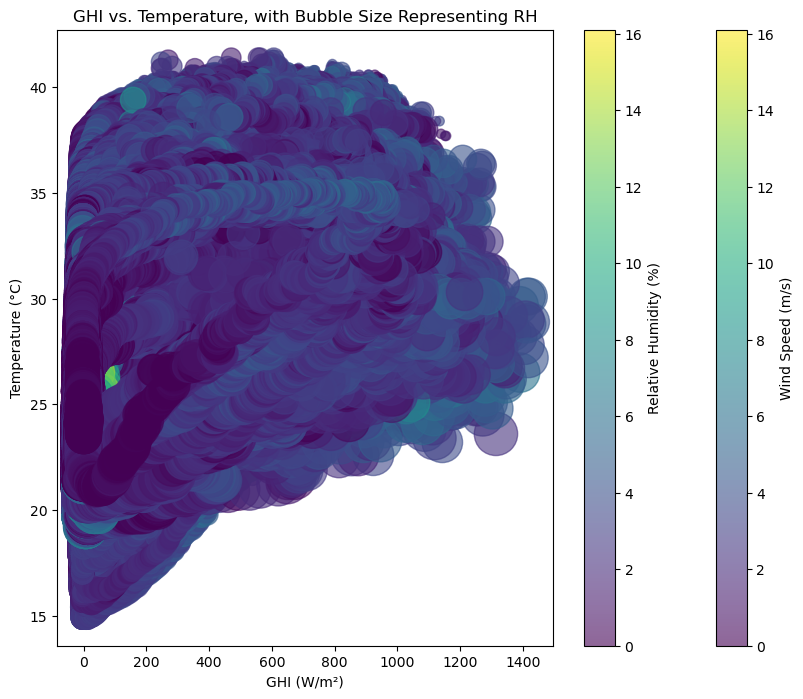

In [23]:

# Create BublePlot
for dataset_name, file_path in dataset_info:
    print(f"{dataset_name}:")
    print()
    data = pd.read_csv(file_path)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    scatter = ax.scatter(data['GHI'], data['Tamb'], s=data['RH']*10, c=data['WS'], cmap='viridis', alpha=0.6)
    
    ax.set_xlabel('GHI (W/m²)')
    ax.set_ylabel('Temperature (°C)')
    ax.set_title('GHI vs. Temperature, with Bubble Size Representing RH')
    
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Wind Speed (m/s)')
    
    cbar = fig.colorbar(scatter, ax=ax, label='Relative Humidity (%)')
    cbar.set_label('Relative Humidity (%)')
    
    plt.show()